<h1> 컴퓨터공학부/202055048/김서원 </h1>


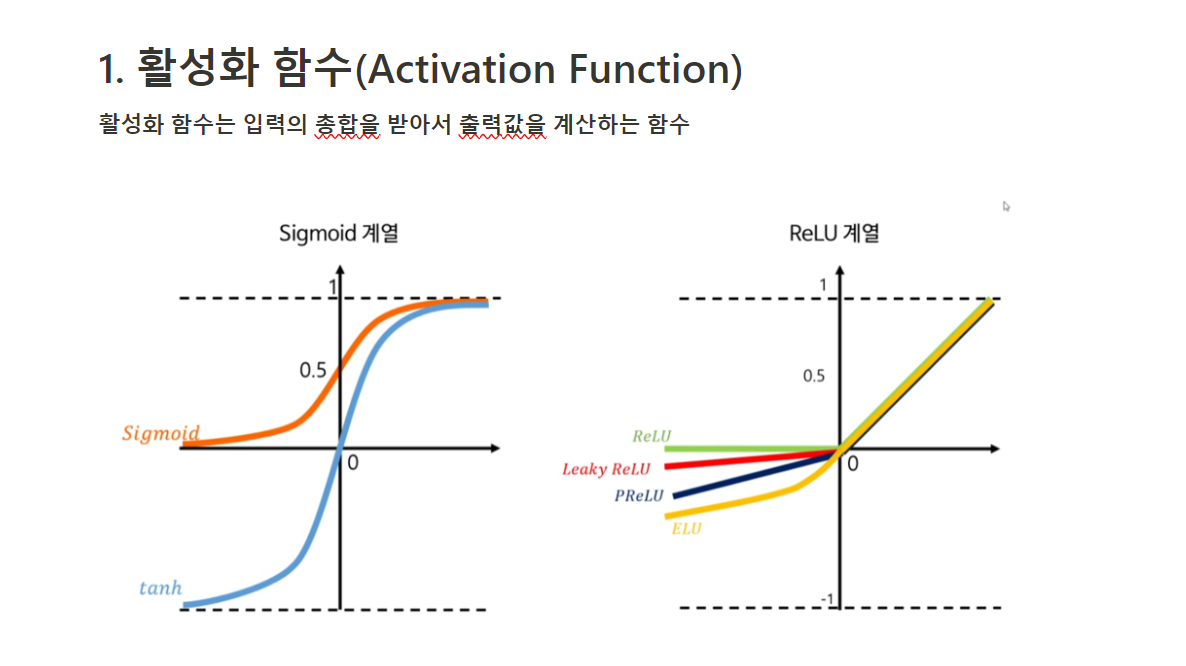

In [40]:
import numpy as np
import matplotlib.pyplot as plt

***계단함수***


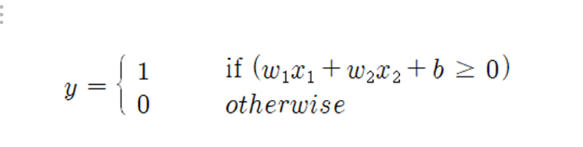 <br>
 선형 결합의 결과값(z)에 활성화 함수를 적용함. 퍼셉트론에서는 주로 계단 함수(step function)가 사용되며, 계단 함수는 특정 임계값을 기준으로 출력값이 결정됨

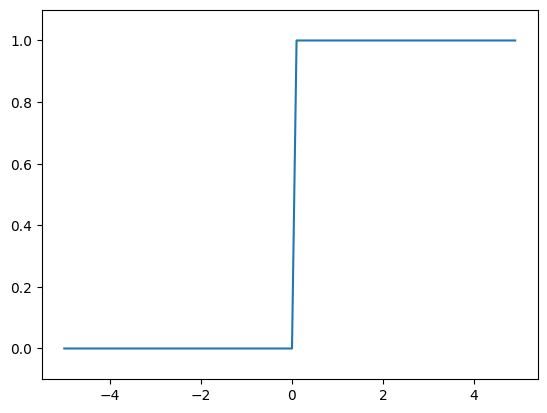

In [41]:
def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()


Logistic Function

### ) **시그모이드 함수(Sigmoid Function)**:

- 신경망의 출력값을 0과 1 사이의 연속적인 확률값으로 출력하여 데이터(입력값)의 참 의미를 잘 표현함
- 이진 분류에 적합

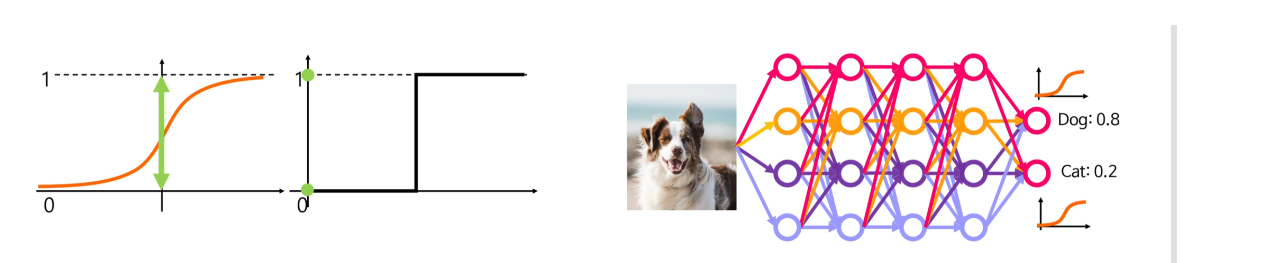

- 단점:

 - 그래디언트 소실 문제(gradient vanishing problem)를 일으킬 수 있음

  - 활성화함수의 출력값이 항상 양수이기 때문에 학습에 비효율성이 생김

In [42]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

step vs Logistic

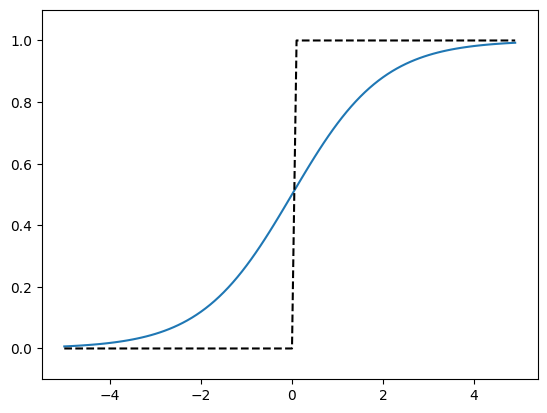

In [43]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid_function(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1)
plt.show()

ReLu func

### **ReLU 함수(Rectified Linear Unit)**:

- 음수를 0으로 만들고 출력범위를 0 이상으로 하여 계산 효율을 높임:  그래디언트 소실 문제를 해결하여 오늘날 딥러닝의 혁신을 가져온 중요한 계기가 됨
- **특징**: 연산이 간단하고, 그래디언트 소실 문제를 어느 정도 해결하지만, '죽은 ReLU(dead ReLU)' 문제가 발생할 수 있다
개선 함수 => LEAKY RELU , tanh 등등

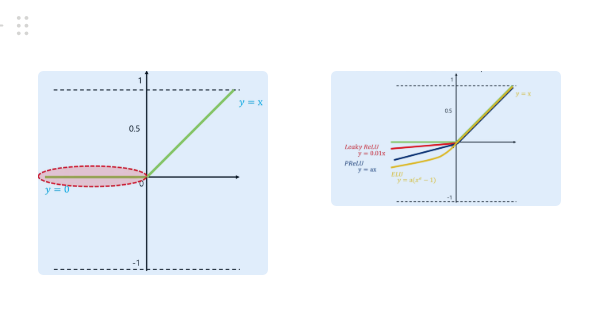

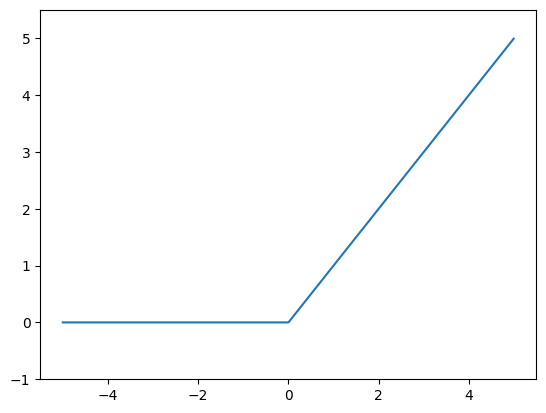

In [44]:
def relu_function(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.01)
y = relu_function(x)
plt.plot(x, y)
plt.ylim(-1, 5.5)
plt.show()


항등함수
주로 최종 결과 값을 나타냄 y = f(x)

In [45]:
def identity_function(x):
    return x

### 소프트맥스 **함수(softmax)**:

- 소프트맥스(softmax)함수는 큰 수는 더 크게 하고 작은 수는 더 작게 하며
- 출력값의 범위를 (0, 1) 사이로 제한하고 출력값들의 합이 1이 되도록 만들어 각 클래스에 대한 확률 분포 제공:  다중클래스 분류에 적합

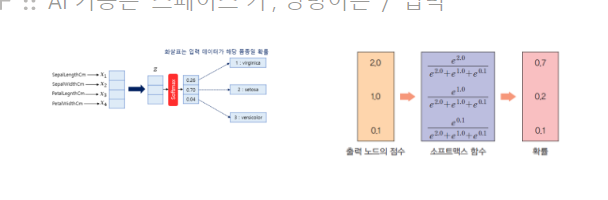

forward 신경망

### 활성화 함수가 신경망에 미치는 영향

- 활성화 함수의 선택은 신경망의 성능과 학습 능력에 결정적인 영향을 미치기 때문에 특정 문제에 적합한 활성화 함수를 선택하는 것이 중요

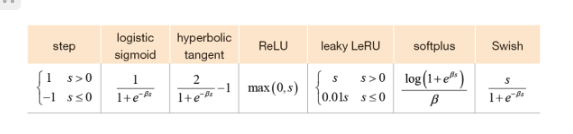

In [46]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    network['W4'] = np.array([0.5,0.5])
    network['b4'] = np.array([0.1, 0.2])
    return network
    
def forward(network, x):
    W1, W2, W3, W4 = network['W1'], network['W2'], network['W3'], network['W4']
    b1, b2, b3 ,b4 = network['b1'], network['b2'], network['b3'], network['b4']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid_function(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid_function(a2)
    a3 = np.dot(z2, W3) + b3
    z3 = sigmoid_function(a3)
    a4 = np.dot(z3,W4)+ b4
    
    
    y = identity_function(a4)
    
    return y    

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.72295654 0.82295654]


In [49]:
import numpy as np

def out(x):
    return np.dot(x, W) > 0

def train(X, Y, epochs=10):
    global W, learning_rate
    for t in range(epochs):
        print('epoch =', t, 'W=', W, '============================')
        ajusted = 0
        for i in range(len(X)):
            Y_hat = out(X[i])
            error = Y[i] - Y_hat
            if error != 0:
                ajusted += 1  # ajusted = ajusted + 1
                W += learning_rate * error * X[i]
                print('입력값:', X[i], '정답:', Y[i], '출력:', Y_hat, '변경된 가중치:', W, 'error:', error)
        if ajusted == 0:
            return

X = np.array([[-1, -1, 1], [-1, 1, 1], [1, -1, 1], [1, 1, 1]])
Y = np.array([0, 0, 0, 1])
W = np.array([0, 0, 0], dtype=np.float64)
learning_rate = 0.1
train(X, Y, 100)


epoch = 0 W= [0. 0. 0.] ============================
입력값: [1 1 1] 정답: 1 출력: False 변경된 가중치: [0.1 0.1 0.1] error: 1
epoch = 1 W= [0.1 0.1 0.1] ============================
입력값: [-1  1  1] 정답: 0 출력: True 변경된 가중치: [0.2 0.  0. ] error: -1
입력값: [ 1 -1  1] 정답: 0 출력: True 변경된 가중치: [ 0.1  0.1 -0.1] error: -1
epoch = 2 W= [ 0.1  0.1 -0.1] ============================


In [48]:
def activation(s):
    if s >0:
        return -1
    else:
        return -1

def out(x):
    return activation(W.dot(x))


def train(X, Y, epochs=10):
    global W, learning_rate
    for t in range(epochs):
        print('epoch =', t, 'W=', W)
        ajusted = 0
        for i in range(len(X)):
            Y_hat = out(X[i])
            error = Y[i] - Y_hat
            if error != 0:
                ajusted += 1
                W += learning_rate * error * X[i]
                print('입력값:', X[i], '정답:', Y[i], '출력:', Y_hat, '변경된 가중치:', W, 'error:', error)
        if ajusted == 0:
            return

X = np.array([[-1, -1, 1], [-1, 1, 1], [1, -1, 1], [1, 1, 1]])
Y = np.array([0, 0, 0, 1])
W = np.array([0, 0, 0], dtype=np.float64)
learning_rate = 0.1
train(X, Y, 100)


epoch = 0 W= [0. 0. 0.]
입력값: [-1 -1  1] 정답: 0 출력: -1 변경된 가중치: [-0.1 -0.1  0.1] error: 1
입력값: [-1  1  1] 정답: 0 출력: -1 변경된 가중치: [-0.2  0.   0.2] error: 1
입력값: [ 1 -1  1] 정답: 0 출력: -1 변경된 가중치: [-0.1 -0.1  0.3] error: 1
입력값: [1 1 1] 정답: 1 출력: -1 변경된 가중치: [0.1 0.1 0.5] error: 2
epoch = 1 W= [0.1 0.1 0.5]
입력값: [-1 -1  1] 정답: 0 출력: -1 변경된 가중치: [0.  0.  0.6] error: 1
입력값: [-1  1  1] 정답: 0 출력: -1 변경된 가중치: [-0.1  0.1  0.7] error: 1
입력값: [ 1 -1  1] 정답: 0 출력: -1 변경된 가중치: [0.  0.  0.8] error: 1
입력값: [1 1 1] 정답: 1 출력: -1 변경된 가중치: [0.2 0.2 1. ] error: 2
epoch = 2 W= [0.2 0.2 1. ]
입력값: [-1 -1  1] 정답: 0 출력: -1 변경된 가중치: [0.1 0.1 1.1] error: 1
입력값: [-1  1  1] 정답: 0 출력: -1 변경된 가중치: [0.  0.2 1.2] error: 1
입력값: [ 1 -1  1] 정답: 0 출력: -1 변경된 가중치: [0.1 0.1 1.3] error: 1
입력값: [1 1 1] 정답: 1 출력: -1 변경된 가중치: [0.3 0.3 1.5] error: 2
epoch = 3 W= [0.3 0.3 1.5]
입력값: [-1 -1  1] 정답: 0 출력: -1 변경된 가중치: [0.2 0.2 1.6] error: 1
입력값: [-1  1  1] 정답: 0 출력: -1 변경된 가중치: [0.1 0.3 1.7] error: 1
입력값: [ 1 -1  1] 정답: 0 출력: -1 변경된 가중치: 